## Importing libraries

In [205]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Loading and previewing data

In [206]:
credit_card_data=pd.read_csv('credit_risk.csv')
dataset=credit_card_data.copy()

In [207]:
print(f'Dataset shape: {dataset.shape}')
dataset

Dataset shape: (32581, 12)


,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


## 3. Statistical summaries

In [208]:
#Statistical Data Analysis
dataset.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


* Checking the Min and Max ranges it can be seen that there are variation (e.g. Age,Income,Emp_length etc) suggesting the presence of extreme values.

## 4. Exploratory Data Analysis

In [209]:
#Checking the number of missing values for each column
dataset.isnull().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [210]:
#Dealing with Missing Values
median_emp_length = dataset['Emp_length'].median()
dataset['Emp_length'].fillna(median_emp_length, inplace=True)

median_rate = dataset['Rate'].median()
dataset['Rate'].fillna(median_rate, inplace=True)

print(f'New missing value count are as follows:\n{dataset.isnull().sum()}')


New missing value count are as follows:
Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64


C:\Users\stefan.mills\AppData\Local\Temp\ipykernel_24544\1759913197.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Emp_length'].fillna(median_emp_length, inplace=True)
C:\Users\stefan.mills\AppData\Local\Temp\ipykernel_24544\1759913197.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

## 5 Outlier cases where the Emp_length is greater than Age

In [211]:
dataset['age_emp_length_check']=dataset['Emp_length'] > dataset['Age']
filtered_dataset = dataset[dataset['age_emp_length_check']]
filtered_dataset

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length,age_emp_length_check
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3,True
210,210,21,192000,MORTGAGE,123.0,VENTURE,20000,6.54,0,0.10,N,4,True


In [212]:
# Replace invalid Emp_length values with NaN
dataset.loc[dataset['Emp_length'] > dataset['Age'], 'Emp_length'] = np.nan
dataset.isnull().sum()


Id                      0
Age                     0
Income                  0
Home                    0
Emp_length              2
Intent                  0
Amount                  0
Rate                    0
Status                  0
Percent_income          0
Default                 0
Cred_length             0
age_emp_length_check    0
dtype: int64

In [213]:
#Replacing NaN with median
median_emp_length = dataset['Emp_length'].median()
dataset['Emp_length'].fillna(median_emp_length, inplace=True)
dataset.isnull().sum()

C:\Users\stefan.mills\AppData\Local\Temp\ipykernel_24544\2731563532.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Emp_length'].fillna(median_emp_length, inplace=True)


Id                      0
Age                     0
Income                  0
Home                    0
Emp_length              0
Intent                  0
Amount                  0
Rate                    0
Status                  0
Percent_income          0
Default                 0
Cred_length             0
age_emp_length_check    0
dtype: int64

## Label Encoding Default Column

In [214]:
dataset['Default'] = dataset['Default'].map({'Y': 1, 'N': 0})
dataset

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length,age_emp_length_check
0,0,22,59000,RENT,4.0,PERSONAL,35000,16.02,1,0.59,1,3,True
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,0,2,False
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,0,3,False
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,0,2,False
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,1,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,0,30,False
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,0,19,False
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,0,28,False
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,0,26,False


## Visualization

## Applying One Hot Encoding to Other columns with more than one category

* All each category will form a unique column which will be populated with 0 True/ False (1,0)
* For each category that has been onehot encoded, one of the categories will be dropped to prevent the <b> Dummy Variable Trap </b>
* Multiple columns will be generated

In [215]:
dataset = pd.get_dummies(dataset, columns=['Home', 'Intent'], drop_first=True)
dataset

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Default,Cred_length,age_emp_length_check,Home_OTHER,Home_OWN,Home_RENT,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,0,22,59000,4.0,35000,16.02,1,0.59,1,3,True,False,False,True,False,False,False,True,False
1,1,21,9600,5.0,1000,11.14,0,0.10,0,2,False,False,True,False,True,False,False,False,False
2,2,25,9600,1.0,5500,12.87,1,0.57,0,3,False,False,False,False,False,False,True,False,False
3,3,23,65500,4.0,35000,15.23,1,0.53,0,2,False,False,False,True,False,False,True,False,False
4,4,24,54400,8.0,35000,14.27,1,0.55,1,4,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,1.0,5800,13.16,0,0.11,0,30,False,False,False,False,False,False,False,True,False
32577,32577,54,120000,4.0,17625,7.49,0,0.15,0,19,False,False,False,False,False,False,False,True,False
32578,32578,65,76000,3.0,35000,10.99,1,0.46,0,28,False,False,False,True,False,True,False,False,False
32579,32579,56,150000,5.0,15000,11.48,0,0.10,0,26,False,False,False,False,False,False,False,True,False


## Seperating the Dependent and Independent Variables

In [216]:

X = dataset.drop(['Status','Id','age_emp_length_check'], axis=1) # All columns except Status, Id,age_emp_length_check
y = dataset['Status'] # Target Variable

X

,Age,Income,Emp_length,Amount,Rate,Percent_income,Default,Cred_length,Home_OTHER,Home_OWN,Home_RENT,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,22,59000,4.0,35000,16.02,0.59,1,3,False,False,True,False,False,False,True,False
1,21,9600,5.0,1000,11.14,0.10,0,2,False,True,False,True,False,False,False,False
2,25,9600,1.0,5500,12.87,0.57,0,3,False,False,False,False,False,True,False,False
3,23,65500,4.0,35000,15.23,0.53,0,2,False,False,True,False,False,True,False,False
4,24,54400,8.0,35000,14.27,0.55,1,4,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0.11,0,30,False,False,False,False,False,False,True,False
32577,54,120000,4.0,17625,7.49,0.15,0,19,False,False,False,False,False,False,True,False
32578,65,76000,3.0,35000,10.99,0.46,0,28,False,False,True,False,True,False,False,False
32579,56,150000,5.0,15000,11.48,0.10,0,26,False,False,False,False,False,False,True,False


## Target Variable Distribution to see balance

<b>  Rejection =0  
Acceptance=1
<b>

In [217]:
y.value_counts()

Status
0    25473
1     7108
Name: count, dtype: int64

<b>Only 17.6% of the loans in the dataset were approved (Status = 1), indicating a high rejection rate.<b>

C:\Users\stefan.mills\AppData\Local\Temp\ipykernel_24544\1954705679.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Status', data=dataset, palette='viridis')


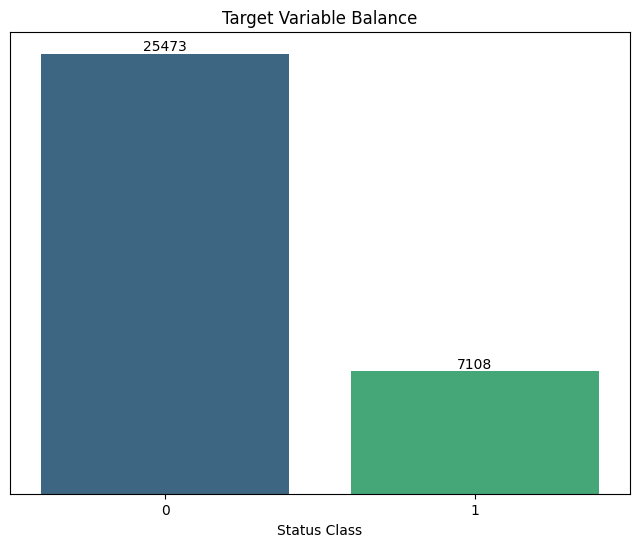

In [218]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Status', data=dataset, palette='viridis')
plt.title('Target Variable Balance')
plt.xlabel('Status Class')
plt.ylabel('Count')

# Add labels on top of the bars without decimals
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

# Remove y-axis values
ax.yaxis.set_visible(False)

plt.grid(False)  # Remove gridlines
plt.show()

<b> A dataset with a significant class imbalance (such as only 21.8% approved loans) can indeed affect model performance, particularly for classification models. This imbalance may lead the model to be biased towards the majority class (in this case, likely predicting more rejections), which may yield high accuracy but poor predictive power for the minority class.<b>

## Building Predictive Model

In [219]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


C:\Users\stefan.mills\AppData\Local\Temp\ipykernel_24544\3769777180.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_train, palette='viridis')


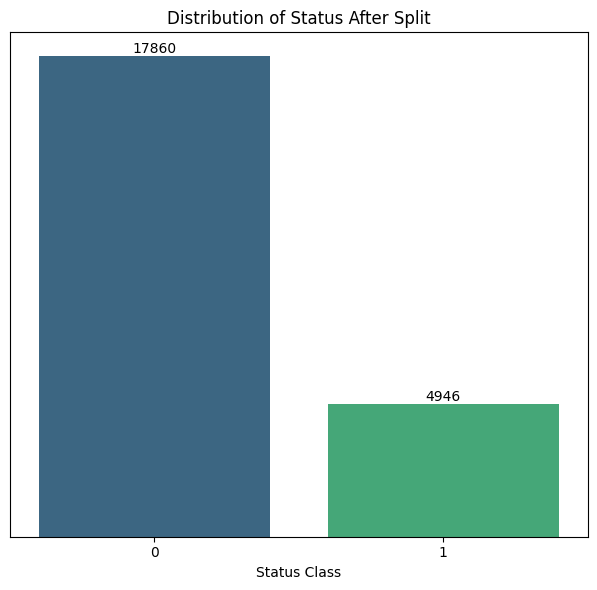

In [220]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Two plots side by side

# Create the count plot for y_train
ax = sns.countplot(x=y_train, palette='viridis')
plt.title('Distribution of Status After Split')
plt.xlabel('Status Class')
plt.ylabel('Count')

# Add labels on top of the bars without decimals
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

# Remove y-axis values
ax.yaxis.set_visible(False)

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

## Scaling Data to have a uniform range for each feature to Avoids Bias Towards Larger Values

 Specifically done after split to prevent <b>Data Leakage<b>

In [221]:
scaler=StandardScaler()

#Do your scaling after split to prevent infromation leakage
numerical_features = ['Income', 'Amount', 'Rate', 'Percent_income']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Transform test data
X_test[numerical_features] = scaler.transform(X_test[numerical_features])



In [222]:
X_train.describe()

,Age,Income,Emp_length,Amount,Rate,Percent_income,Default,Cred_length
count,22806.000000,2.280600e+04,22806.000000,2.280600e+04,2.280600e+04,2.280600e+04,22806.000000,22806.000000
mean,27.756161,-2.180917e-17,4.764097,-4.548770e-17,-3.243335e-16,3.847761e-17,0.175699,5.811058
std,6.416902,1.000022e+00,3.993092,1.000022e+00,1.000022e+00,1.000022e+00,0.380573,4.053376
min,20.000000,-9.564584e-01,0.000000,-1.441341e+00,-1.817272e+00,-1.593106e+00,0.000000,2.000000
25%,23.000000,-4.172118e-01,2.000000,-7.282402e-01,-8.176525e-01,-7.511521e-01,0.000000,3.000000
50%,26.000000,-1.706991e-01,4.000000,-2.528397e-01,-3.630155e-03,-1.898493e-01,0.000000,4.000000
75%,30.000000,2.067735e-01,7.000000,4.206442e-01,6.866608e-01,5.585545e-01,0.000000,8.000000
max,144.000000,9.142418e+01,41.000000,4.025764e+00,3.737616e+00,5.703831e+00,1.000000,30.000000


In [223]:
X_test.describe()

,Age,Income,Emp_length,Amount,Rate,Percent_income,Default,Cred_length
count,9775.000000,9775.000000,9775.000000,9775.000000,9775.000000,9775.000000,9775.000000,9775.000000
mean,27.684297,-0.000228,4.752737,-0.003257,0.009194,-0.002815,0.177801,5.788235
std,6.184561,0.840596,3.952881,1.006120,1.011260,0.996488,0.382364,4.058953
min,20.000000,-0.953377,0.000000,-1.441341,-1.817272,-1.593106,0.000000,2.000000
25%,23.000000,-0.432619,2.000000,-0.728240,-0.817652,-0.751152,0.000000,3.000000
50%,26.000000,-0.170699,4.000000,-0.252840,-0.003630,-0.189849,0.000000,4.000000
75%,30.000000,0.200611,7.000000,0.381028,0.686661,0.558554,0.000000,8.000000
max,123.000000,30.408956,30.000000,4.025764,3.978567,6.171583,1.000000,30.000000


## Fixing Data Imbalance with Synthetic Minority Oversampling Technique (SMOTE)

In [224]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

C:\Users\stefan.mills\AppData\Local\Temp\ipykernel_24544\4074954071.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x=y_train, palette='viridis')
C:\Users\stefan.mills\AppData\Local\Temp\ipykernel_24544\4074954071.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(x=y_train_resampled, palette='viridis')


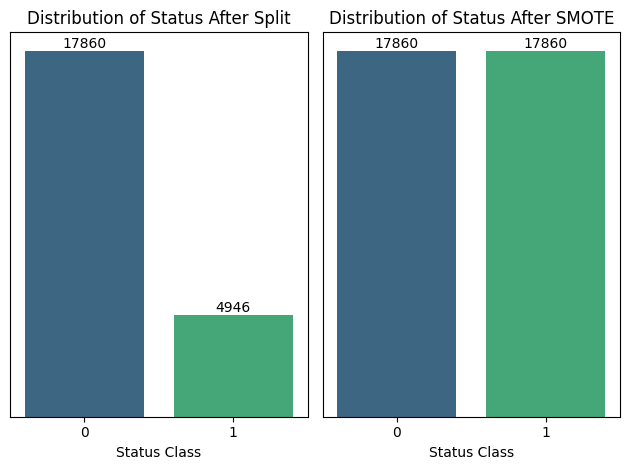

In [225]:
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x=y_train, palette='viridis')
plt.title('Distribution of Status After Split')
plt.xlabel('Status Class')
plt.ylabel('Count')

# Add labels on top of the bars without decimals
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom')

# Remove y-axis values
ax1.yaxis.set_visible(False)

# Second subplot: Distribution of y_train_resampled
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x=y_train_resampled, palette='viridis')
plt.title('Distribution of Status After SMOTE')
plt.xlabel('Status Class')
plt.ylabel('Count')

# Add labels on top of the bars without decimals
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom')

# Remove y-axis values
ax2.yaxis.set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

## Training Data on SMOTE Data

In [226]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

## Making Predictions

In [227]:

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(X_test.shape)


Accuracy: 0.9006649616368286
(9775, 16)


## Classification Report

In [228]:
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Display the DataFrame
print("Classification Report:\n", report_df)

Classification Report:
               precision    recall  f1-score      support
0              0.925224  0.949166  0.937042  7613.000000
1              0.803053  0.729880  0.764720  2162.000000
accuracy       0.900665  0.900665  0.900665     0.900665
macro avg      0.864139  0.839523  0.850881  9775.000000
weighted avg   0.898203  0.900665  0.898929  9775.000000


## Confusion Matrix


Confusion matrix:
 [[7226  387]
 [ 584 1578]]


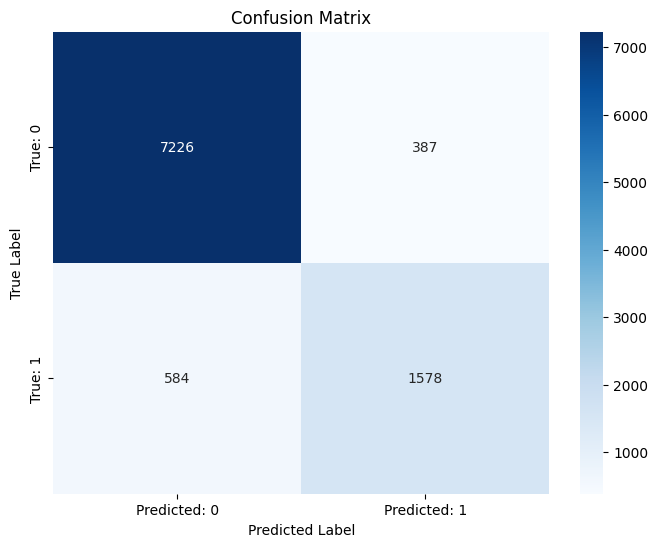

In [229]:
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(f'Confusion matrix:\n {cm}')

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted: 0', 'Predicted: 1'], 
            yticklabels=['True: 0', 'True: 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Saving Model To Pickle to Help in Deployment

In [230]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

## Saving The Scaler

In [231]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
